<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [1]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [2]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [15]:
import numpy as np

mu = 180 # mean
sigma = 5 # standard deviation

sample1 = np.random.normal(mu, sigma, 1000)
sample2 = np.random.normal(mu, sigma, 800)

sample

array([187.46471644, 178.85179476, 182.8028522 , 175.69116292,
       178.47897576, 178.4069673 , 183.57369106, 187.21631082,
       179.17968914, 175.35623534, 179.8577168 , 178.64420335,
       177.19524249, 186.16685478, 181.67459214, 193.38797424,
       178.57025217, 172.71503305, 182.0353786 , 183.08217081,
       176.68658317, 179.38577236, 178.92991722, 172.98387737,
       175.95471142, 187.78493999, 173.43789078, 175.42336381,
       182.09520683, 184.17344945, 176.2718048 , 181.28348094,
       182.42068814, 180.23511849, 174.27572147, 178.70024806,
       176.03128217, 185.3584652 , 180.04887897, 179.30752397,
       182.20261827, 182.48744277, 184.19681239, 167.73555559,
       181.30778369, 173.97252733, 176.98097047, 168.30567204,
       181.82230385, 181.45960887, 178.21245826, 181.05500756,
       170.40452789, 174.24128325, 183.94085033, 187.13862392,
       184.03221001, 180.00148992, 173.61585675, 185.53312962,
       173.74340045, 174.63336188, 183.78176126, 173.99

In [12]:
# Verify the mean of our sample

np.mean(sample)

abs(mu - np.mean(sample)) < 0.01

False

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

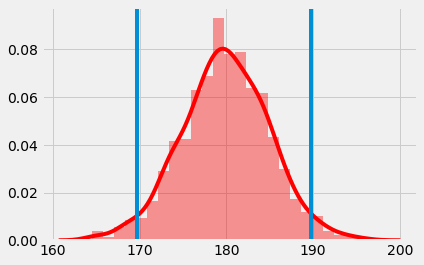

In [13]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

When we talk about the *population parameters*: we use $\mu$ and $\sigma$ for mean and standard deviation

When we talk about the sample *sample statistics*" we use x and s

# Our first 2-sample t-test (pancake example)

1) Null Hypothesis
$\bar{x}_{1} == \bar{x}_{2}$

or that the average cooking times between the two burners is the same

2) Alternative Hypothesis: (the opposite of the null)

$\bar{x}_{1} \neq \bar{x}_{2}$

$\bar{x}_{1}-\bar{x}_{2} \neq 0$

3) Confidence level: The probability of seeing a true result in spite of random variability. (How often do I want to make sure that I'm right.) Typically: 95%, 99%, 99.9%

In [21]:
from scipy.stats import ttest_ind

ttest_ind(sample1, sample2)

Ttest_indResult(statistic=3.4138152722152926, pvalue=0.0006548188130454848)

4) T Statistic: A value that falls along a t distribution.
 - A vertical bar that falls on out t-distribution

 5) P-value: THe p-value that we're interested in is (1-confidence level) or in our case 0.05
 
 The probability of getting that test result (t-statistic) due to random chance
 
 THe probability of our null hypothesis being true
 
 6) Conclusions

Due to observing a t-statistic of 8.9 and a resulting p-value of 0.0000000000109, we reject the null hypothesis that the cooking times of these two burners is the same and suggest the alternative hypothesis that they are different.

(Because our p-value was less than 0.05, we reject the null hypothesis)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

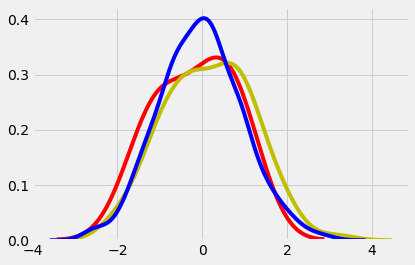

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

!wget http://archive.ics.uci.edu/

In [23]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df=pd.read_csv('house-votes-84.data',header=None, names=column_headers, 
               na_values="?")

df.head()

FileNotFoundError: ignored

In [0]:
df=df.replace({'y':1, 'n':0})

df.head()

In [0]:
df['party']=value_counts()

In [0]:
rep = df[df['party']=='republican']
rep.head()

In [0]:
dem = df[df['party']=='democrat']
dem.head()

In [0]:
rep['handicapped-infants'].sum()/len(rep)

#len is counting NaN values too

In [24]:
#Percentage of republicans who voted "yes"
#on the handicapped-infants bill

rep['handicapped-infants'].mean()

col = rep['handicapped-infants']

np.isnan(col)

handicapped_infants_no_nans = col[~np.isnan(col)]

handicapped_infants_no_nans

handicapped_infants_no_nans.sum()/len(handicapped_infants_no_nans)



NameError: ignored

#Lets look at the water projects bill

1) Null Hypothesis: There is no difference between voting rates (levels of support) for the 'water projects' bill between democrats and republicans in the house of representatives. (support is equal)

$\bar{x}_{1} == \bar{x}_{x}$

Where $\bar{x}_{1}$ is the mean of the republican votes and $\bar{x}_{2}$ is the mean of the Democrat votes.

2) Alternative hypthesis: 

$\bar{x}_{1} \neq \bar{x}_{2}$

Levels of support between the two parties will differ.

3) 95% confidence level

In [1]:
rep['water-project'].mean()

Couldn't evaluate or find in history: ['water-project'].mean()


In [0]:
dem['water-project'].mean()

In [25]:
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

NameError: ignored

In [0]:
#Remove the NaN values from this column

col = rep['water-project']
rep_water_project_no_nans = col[-np.isnan(col)]

col=dem['water-project']
dem_water_project_no_nans = col[-np.isnan(col)]

#My sample sizes for the samples
print(len(rep_water_project_no_nans))
print(len(dem_water_project_no_nans))

4) T-statistic: 0.089

5) P-value: 0.929

I want to reject the null hypothesis if my p-value is <0.05 or if my p-value is less than (1-confidence level)

Conclusion: due to a p-value of .929 I fail to reject the null hypothesis that republican and democrat support for the water-project bill is different.

I never say that I "accept" the null hypothesis , I just say that I "fail to reject"

#1-sample T-test example

I'm only using one sample and my null hypothesis will be different.

We're looking at Democrat support of the South Africa bill

1a) Null Hypothesis:

$\bar{x}_{1}$ (average dem support for SA bill) ==1

This says that 100% of democrats support this bill.  Full support.

1b) Null Hypothesis:

$\bar{x}_{1}$ (average dem support for SA bill) = 0.5

$\bar{x}_{1}$ (average dem support for SA bill) == 0

This says that 0% of democrats support this bill.  The party is against the bill.

1c) Null Hypothesis

\bar{x}_{1} (average dem support for SA bill) ==0

This says that 0% of democrats support this bill.  The party is against the bill.

1d) Null Hypothesis:

$\bar{x}_{1}$ (average dem support for SA bill) == .78245

This says that 0% of democrats support this bill.  The party is against the bill.

With 1-sample t-tests I can frame that I'm asking through my choice of null hypothesis

1) Null Hypothesis: $\bar{x}_{1}$ (average dem support for SA bill) == .5

THis saus that 50% of democrats support this bill.  THe party is split.

2) Alternative Hypothesis: Support is not equal to .5 of 50%

$\bar{x}_{1}$ (average dem support for SA bill) =/= 5

This says nothing about if support is greater than or less than 50%, it's just saying that it's not 50%, it's different, it's something other than 50%.

3) Confidence level: 95%

In [0]:
from scipy import ttest_lsamp

In [0]:
ttest_lsamp(dem['south-africa'],.5,nan_policy='omit')

In [0]:
dem['south-africa'].mean()

In [0]:
ttest_lsamp(dem['south-africa'],.9,nan_policy='omit')

Fail to reject the null hypothesis.

I conclude that that democrat support for the South Africa bill is not significantly differnt from 90%.

In [0]:
ttest_lsamp(dem['south-africa'], .899, nan_policy='omit')

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means